In [1]:
from pycocotools.coco import COCO
from pycocotools import mask as COCOmask
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
dataDir='.'
dataType='train2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)
print annFile

./annotations/instances_train2014.json


In [3]:
cd  ../data/coco

/scratch/jiadeng_flux/zehuany/coco


In [4]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=22.99s)
creating index...
index created!


[1, 18, 41]


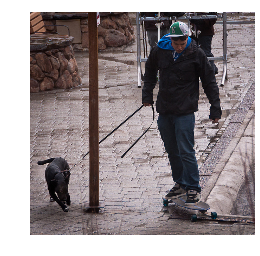

In [53]:
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
print catIds
imgIds = coco.getImgIds(catIds=catIds);
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img['file_name']
I = io.imread('./images/train2014/%s'%(img['file_name']))
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

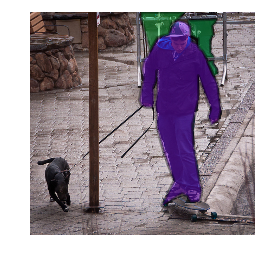

[[537.42,
  176.24,
  533.92,
  172.03,
  535.67,
  168.88,
  533.57,
  162.57,
  523.4,
  148.55,
  524.1,
  140.13,
  507.63,
  142.59,
  520.95,
  173.08,
  523.75,
  180.79,
  526.56,
  183.25,
  532.87,
  180.44],
 [526.22,
  129.38,
  516.94,
  117.44,
  515.61,
  82.95,
  517.95,
  77.37,
  521.2,
  70.17,
  521.56,
  69.27,
  525.34,
  69.27,
  521.2,
  41.16,
  529.48,
  31.61,
  533.45,
  21.52,
  451.29,
  24.22,
  455.43,
  36.65,
  459.57,
  42.06,
  460.83,
  67.46,
  476.69,
  76.11,
  480.83,
  76.29,
  480.65,
  88.55,
  481.2,
  99.9,
  485.34,
  107.28,
  493.27,
  112.51,
  497.95,
  121.16,
  501.74,
  126.56,
  504.26,
  131.97,
  522.1,
  132.15,
  525.7,
  131.25]]

In [56]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds[0], iscrowd=None)
anns = coco.loadAnns(annIds)
plt.imshow(I); plt.axis('off')
coco.showAnns(anns)
plt.show()
anns[1]['segmentation']

In [57]:
from shapely.geometry import Polygon

In [60]:
from shapely.geometry import asPolygon 
a=anns[1]['segmentation'][1]
polygon=Polygon(zip(a[::2],a[1::2]))

In [76]:
polygon=anns[1]['segmentation']
rle=COCOmask.frPyObjects(polygon,img['height'],img['width'])
m = COCOmask.decode(rle)
m=np.sum(m,axis=2)
m.shape

(640, 640)

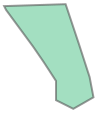

In [83]:
polygon2=Polygon([(a[0],a[1]),(a[0],a[3]),(a[2],a[3]),(a[2],a[1]),(a[0],a[1])])
polygon2.intersection(polygon)

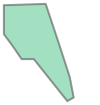

In [88]:
polygon3=Polygon([(a[0]+20,a[1]+50),(a[0]+20,a[3]+10),(a[2]+20,a[3]+40),(a[2],a[1]),(a[0]+50,a[1]+50)])
d=polygon3.intersection(polygon)
d

In [91]:
list(d.exterior.coords)

[(250.96, 130.0992904656319),
 (250.96, 159.10732417138237),
 (292.81, 160.42),
 (306.34, 119.83),
 (316.97, 86.97),
 (320.83, 66.68),
 (314.47657176206775, 63.047680258254616),
 (280.96000000000004, 105.08),
 (268.7590885585003, 105.08),
 (259.95, 117.9),
 (250.96, 130.0992904656319)]

In [86]:
np.array(polygon2.exterior.coords).ravel()

array([ 230.96,   55.08,  230.96,  160.42,  320.83,  160.42,  320.83,
         55.08,  230.96,   55.08])

In [105]:
a={'dd':10,
  'ddd':100,}

In [109]:
a=np.array([[1,2],[2,3]])
a-[2,0]

array([[-1,  2],
       [ 0,  3]])

In [111]:
import scipy.ndimage
a = np.array([[0.,-2.,0.], [-2.,11.,-2.], [0.,-2.,0.]])
out = scipy.ndimage.interpolation.zoom(input=a, zoom=(3,1), order = 2),1


In [117]:
np.sum(a,axis=0)

array([-2.,  7., -2.])

In [118]:
np.zeros_like(a)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [121]:
a=np.array([1,2])
b=np.array([1,2])

In [123]:
a*b

array([1, 4])